In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

print(tf.__version__)

2.12.0


In [2]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('/content/JaipurFinalCleanData.csv').set_index('date')

In [3]:
# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,676.0,26.053254,6.208964,10.00,20.0000,28.000,30.000,38.00
maxtempm,676.0,32.523669,5.987966,18.00,28.0000,33.000,37.000,46.00
mintempm,676.0,19.630178,6.825827,3.00,13.0000,22.000,25.000,32.00
meantempm_1,676.0,26.066568,6.218491,10.00,20.0000,28.000,30.000,38.00
meantempm_2,676.0,26.081361,6.230216,10.00,20.0000,28.000,30.000,38.00
meantempm_3,676.0,26.093195,6.237655,10.00,20.0000,28.000,30.000,38.00
meandewptm_1,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_2,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_3,676.0,11.989645,8.738584,-10.00,5.0000,10.000,21.000,26.00
meanpressurem_1,676.0,1009.499911,6.481713,997.63,1003.6975,1008.830,1015.525,1023.43


In [4]:
df

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-07,24,32,15,22.0,23.0,25.0,4.0,7.0,8.0,1015.39,...,2.0,1018.0,1017.0,1018.0,1012.0,1011.0,1007.0,0.0,0.0,0.0
2018-03-08,24,32,15,24.0,22.0,23.0,2.0,4.0,7.0,1014.07,...,0.0,1017.0,1018.0,1017.0,1011.0,1012.0,1011.0,0.0,0.0,0.0
2018-03-09,26,33,19,24.0,24.0,22.0,1.0,2.0,4.0,1014.41,...,-3.0,1017.0,1017.0,1018.0,1011.0,1011.0,1012.0,0.0,0.0,0.0


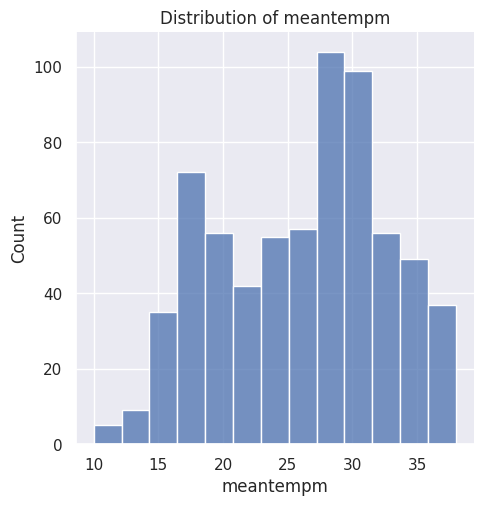

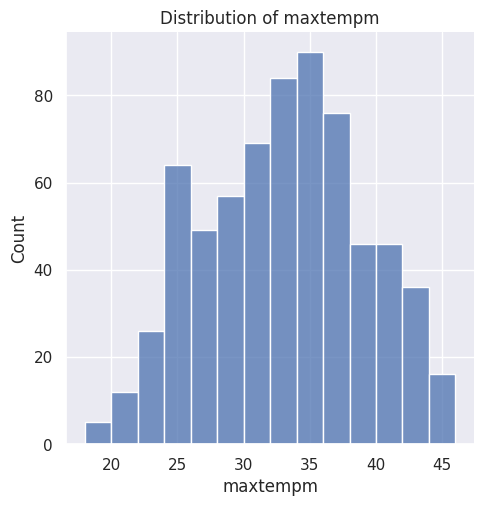

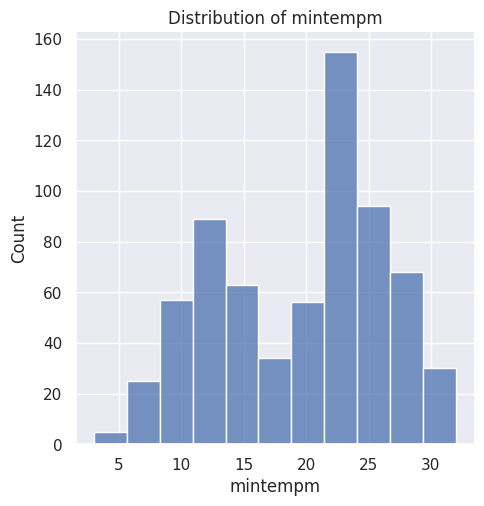

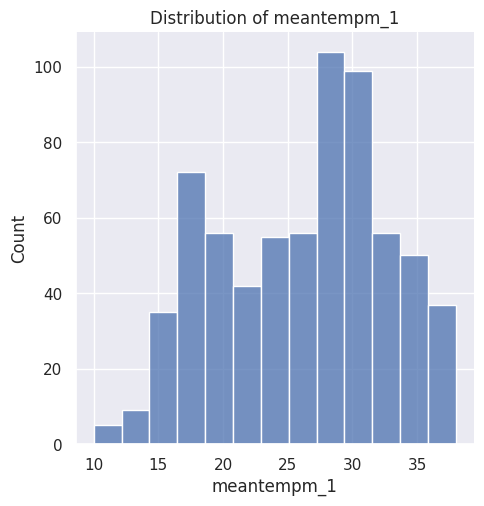

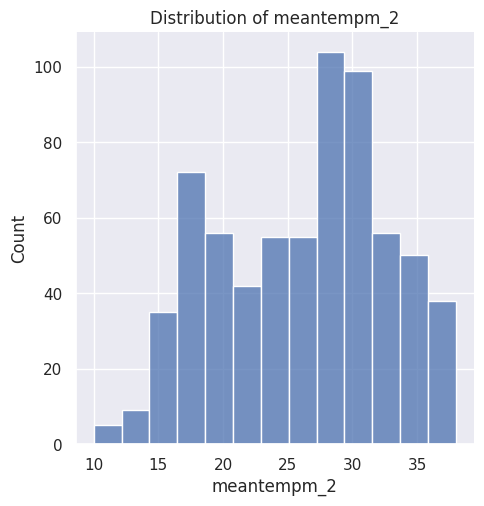

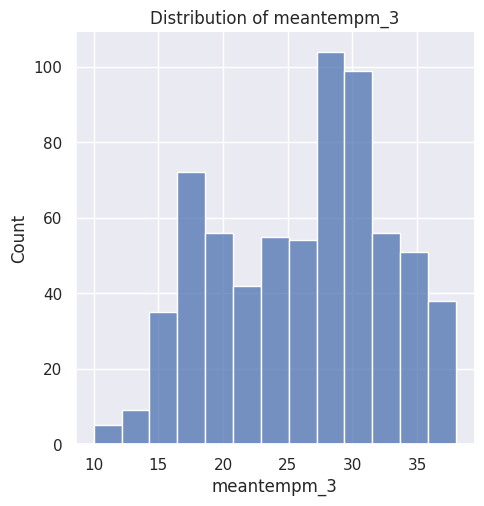

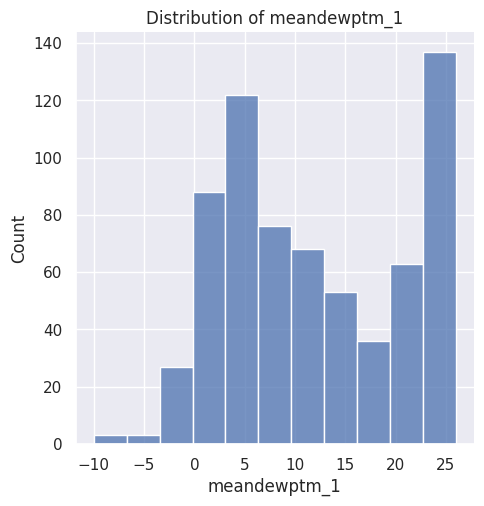

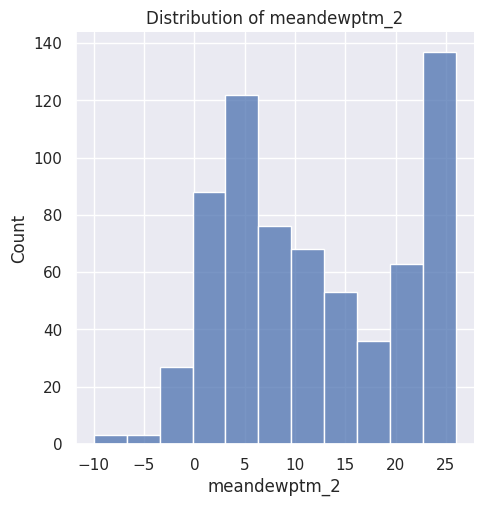

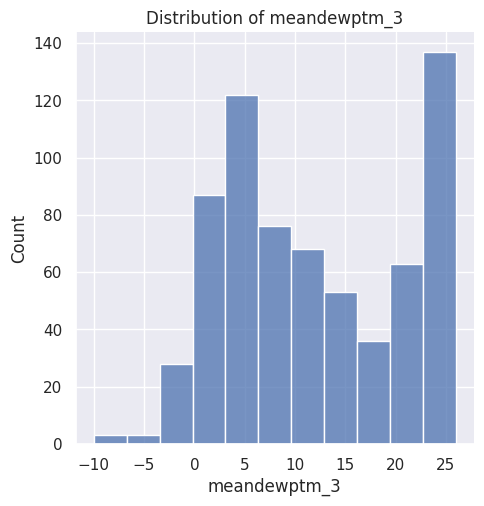

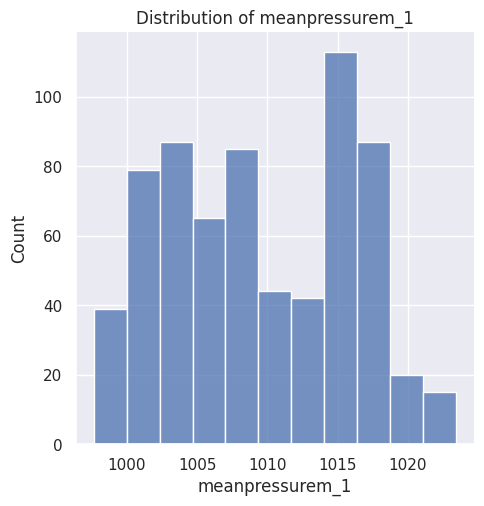

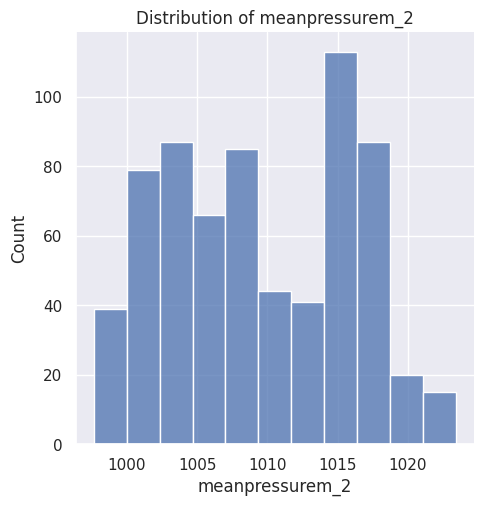

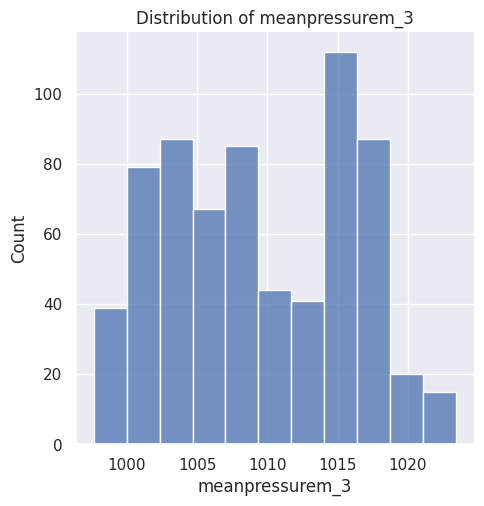

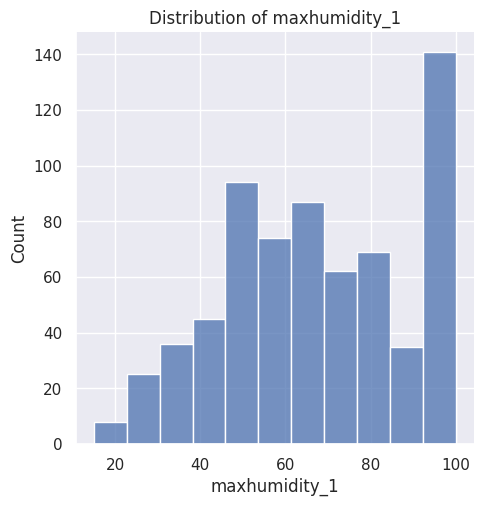

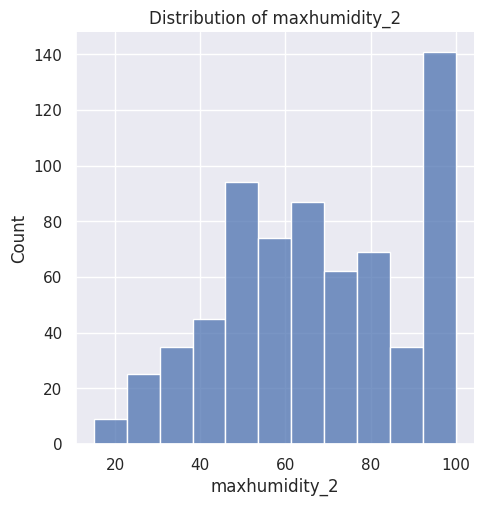

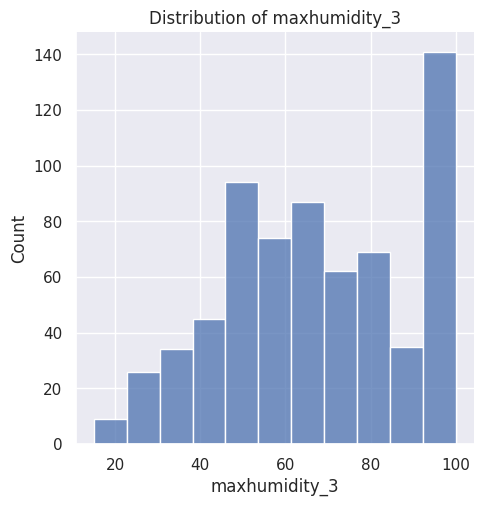

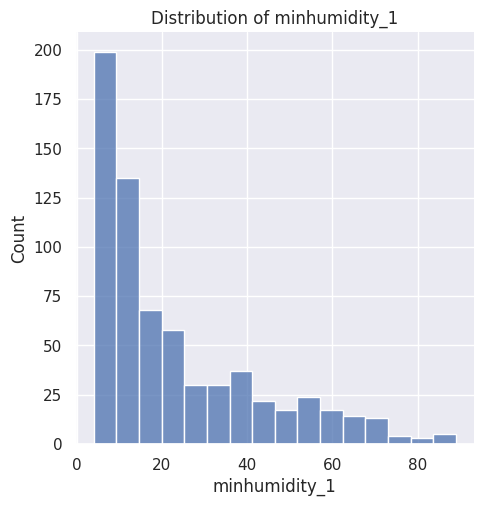

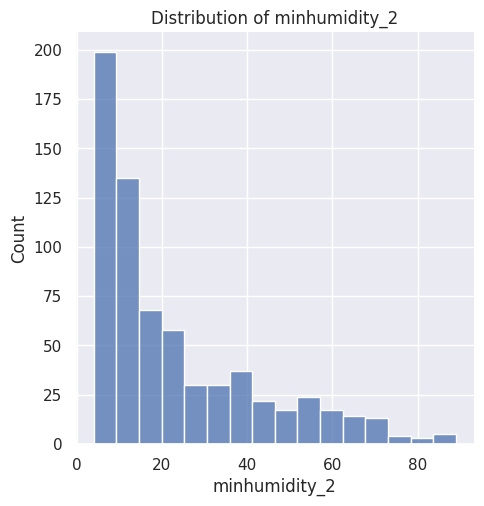

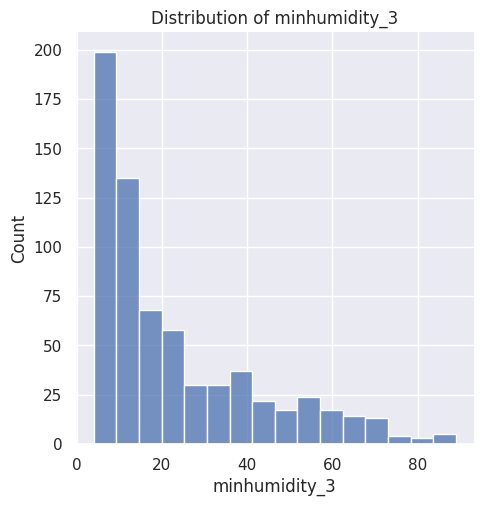

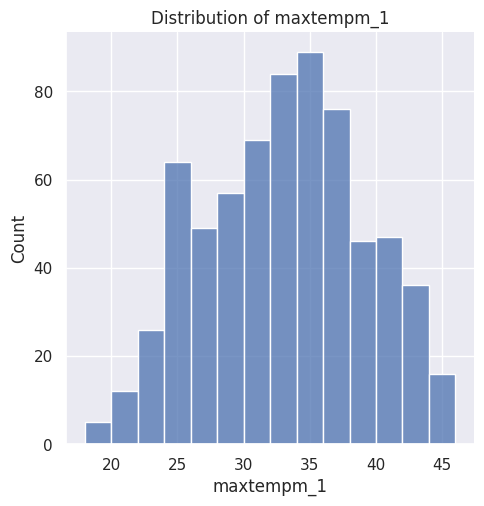

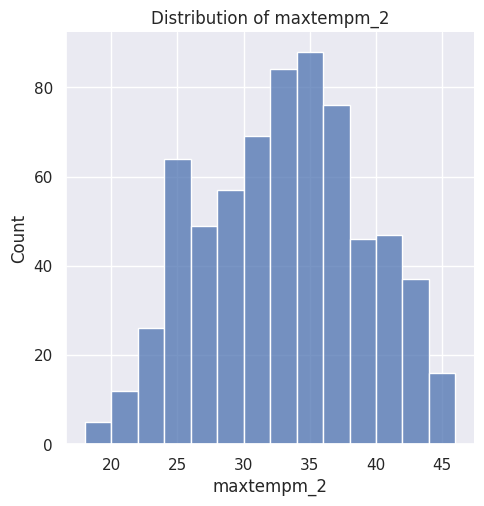

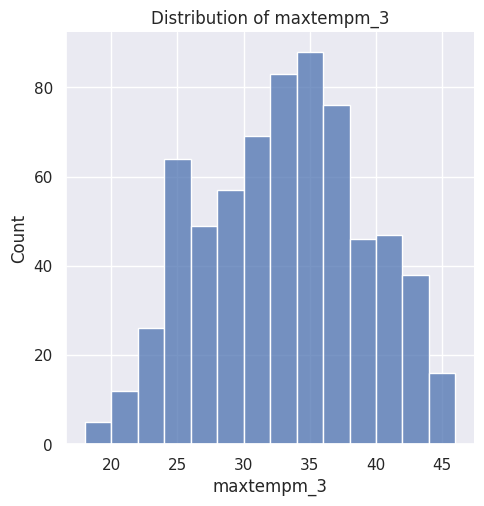

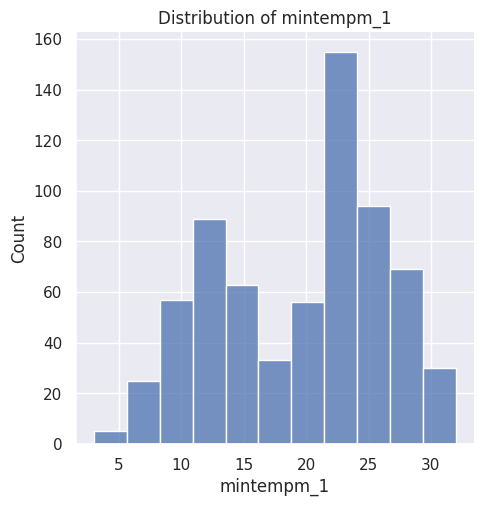

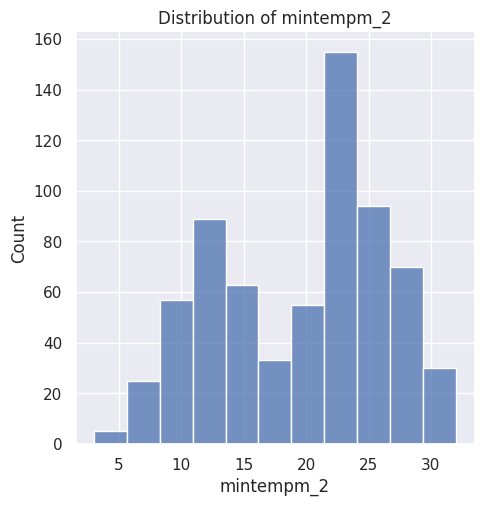

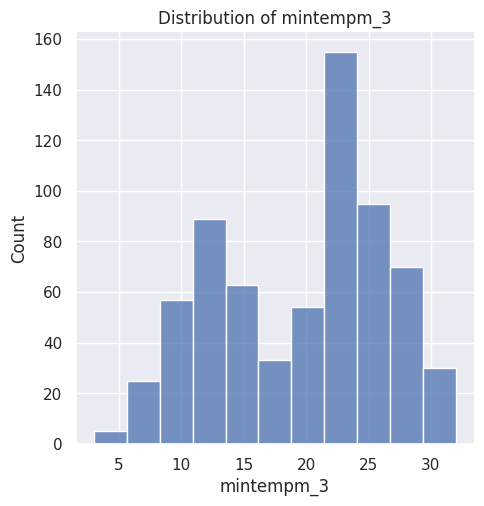

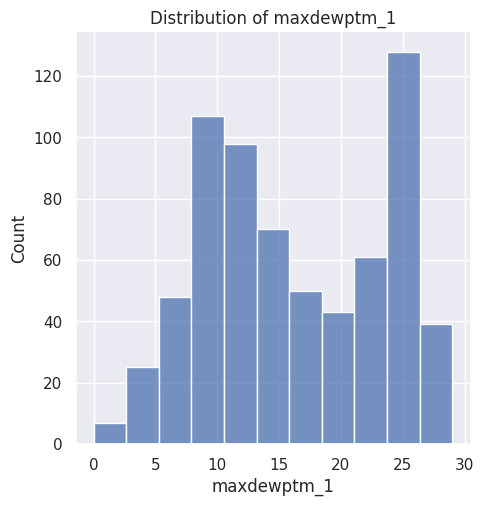

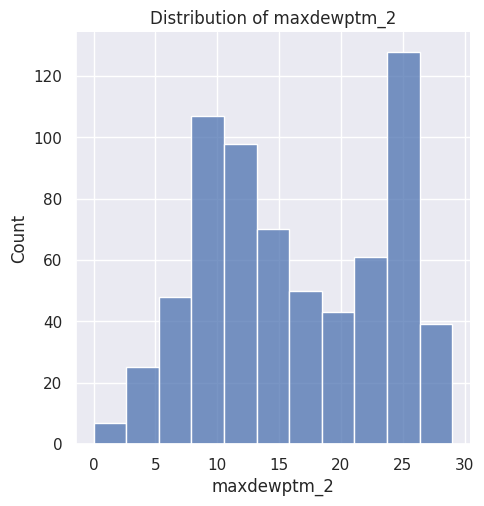

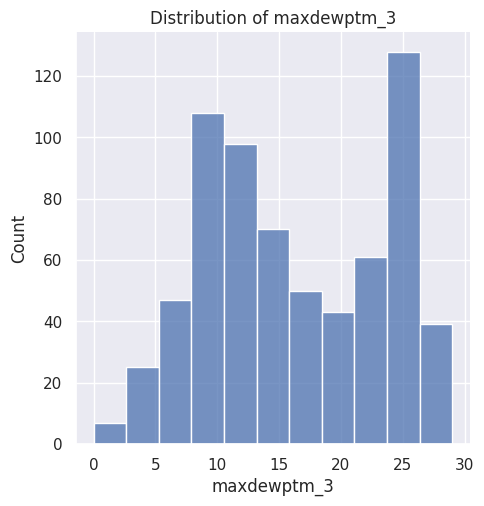

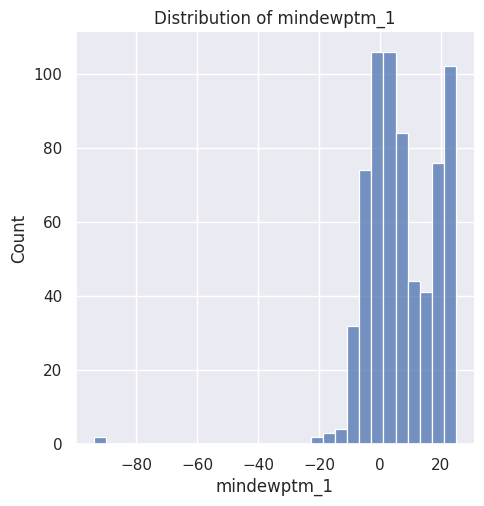

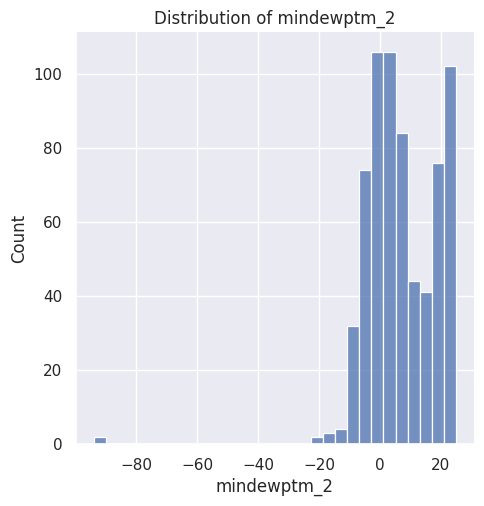

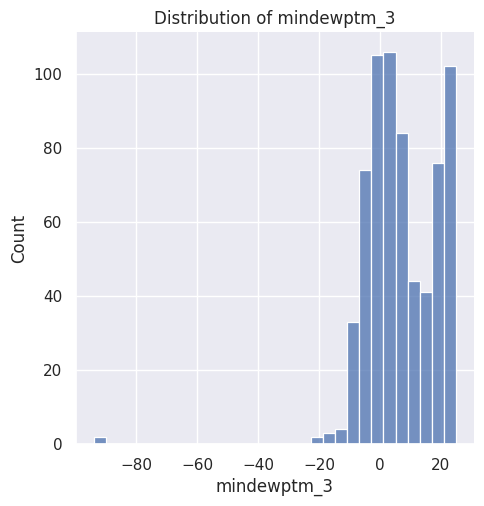

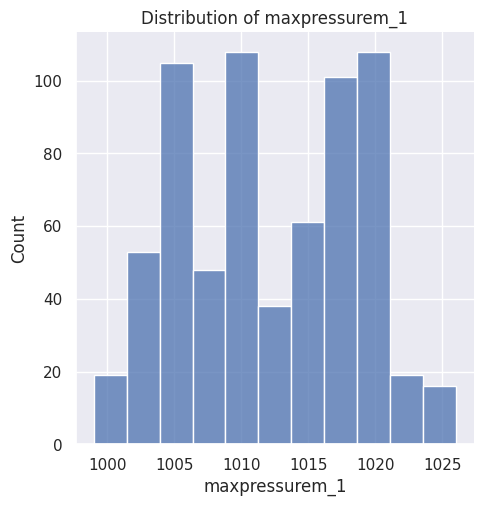

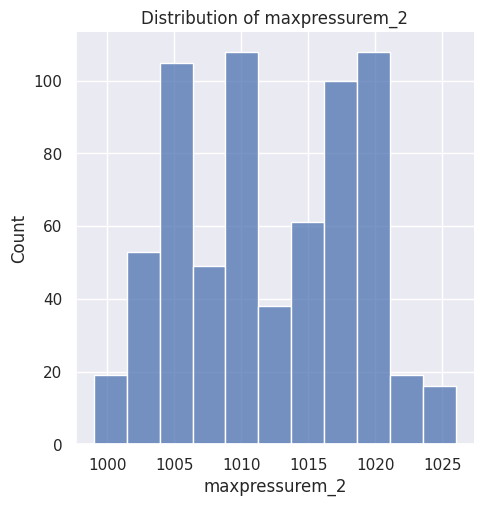

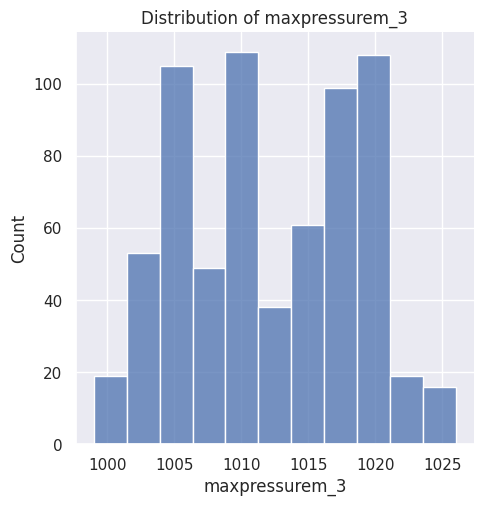

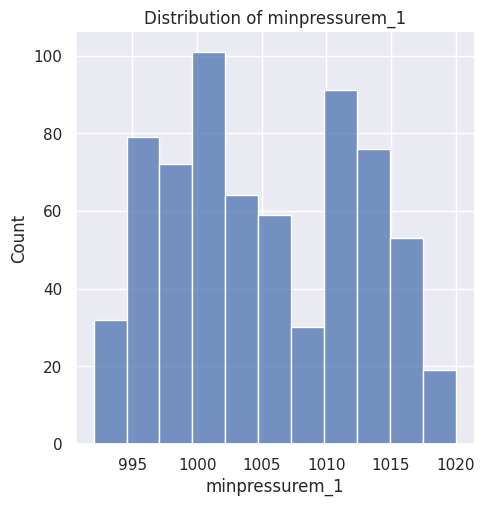

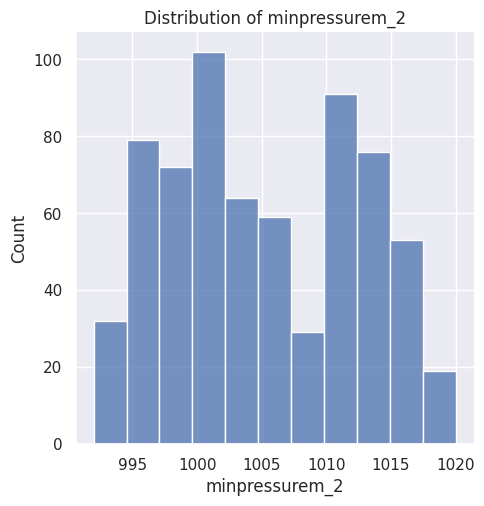

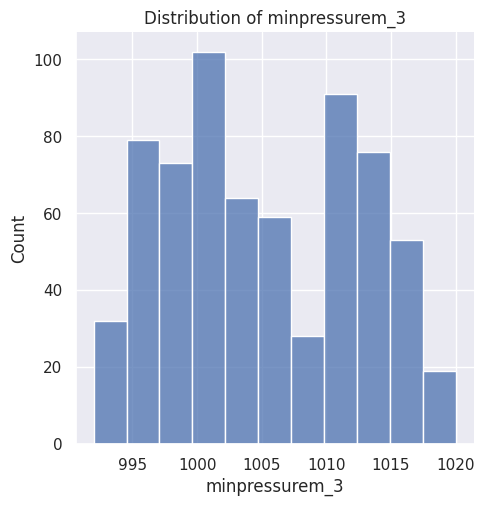

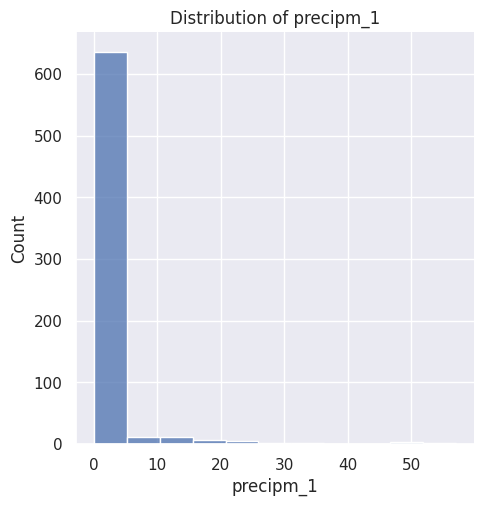

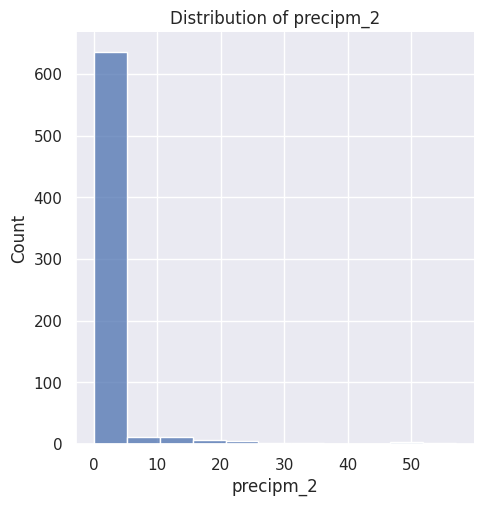

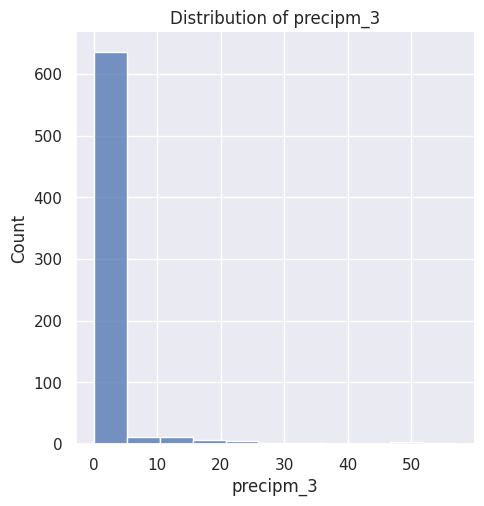

In [5]:
sns.set(style="darkgrid")
for col in df.columns:
    sns.displot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
    plt.show()

In [6]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2016-05-04 to 2018-03-11
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meantempm        676 non-null    int64  
 1   maxtempm         676 non-null    int64  
 2   mintempm         676 non-null    int64  
 3   meantempm_1      676 non-null    float64
 4   meantempm_2      676 non-null    float64
 5   meantempm_3      676 non-null    float64
 6   meandewptm_1     676 non-null    float64
 7   meandewptm_2     676 non-null    float64
 8   meandewptm_3     676 non-null    float64
 9   meanpressurem_1  676 non-null    float64
 10  meanpressurem_2  676 non-null    float64
 11  meanpressurem_3  676 non-null    float64
 12  maxhumidity_1    676 non-null    float64
 13  maxhumidity_2    676 non-null    float64
 14  maxhumidity_3    676 non-null    float64
 15  minhumidity_1    676 non-null    float64
 16  minhumidity_2    676 non-null    float64
 17  minhu

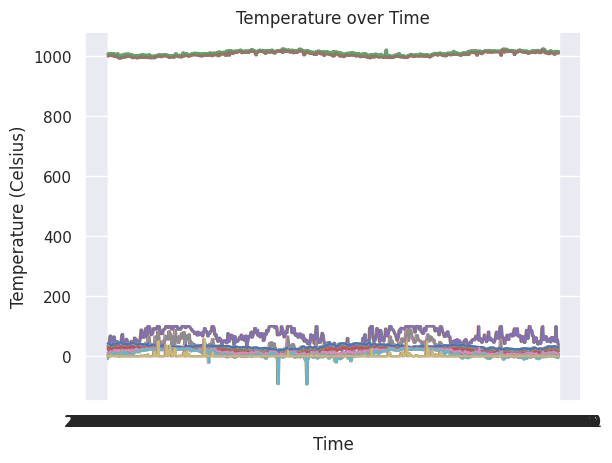

In [7]:
for col in df.columns:
   plt.plot(df[col], label=col)
   plt.xlabel('Time')
   plt.ylabel('Temperature (Celsius)')
   plt.title('Temperature over Time')

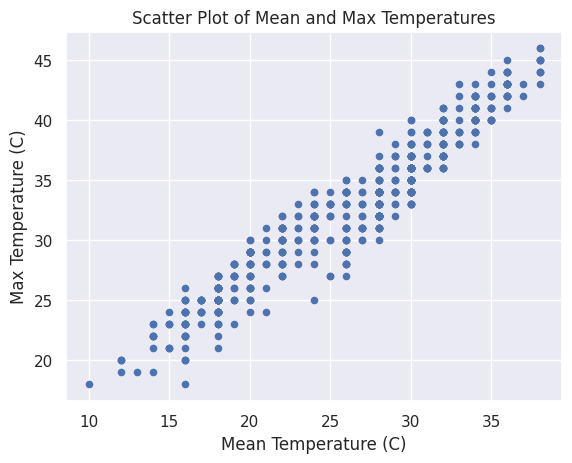

In [8]:
df.plot(kind='scatter', x='meantempm_1', y='maxtempm_1')
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Max Temperature (C)')
plt.title('Scatter Plot of Mean and Max Temperatures')
plt.show()

In [9]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

In [10]:
# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

In [11]:
# y will be a pandas series of the meantempm
y = df['meantempm']

In [12]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [13]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   540, Training features   36
Validation instances 68, Validation features 36
Testing instances    68, Testing features    36


In [15]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [17]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

In [18]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.compat.v1.estimator.inputs.pandas_input_fn (x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [21]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False))) 

In [22]:
evaluations[0]

{'average_loss': 6.7682643,
 'label/mean': 26.57353,
 'loss': 6.7682643,
 'prediction/mean': 26.785906,
 'global_step': 22360}

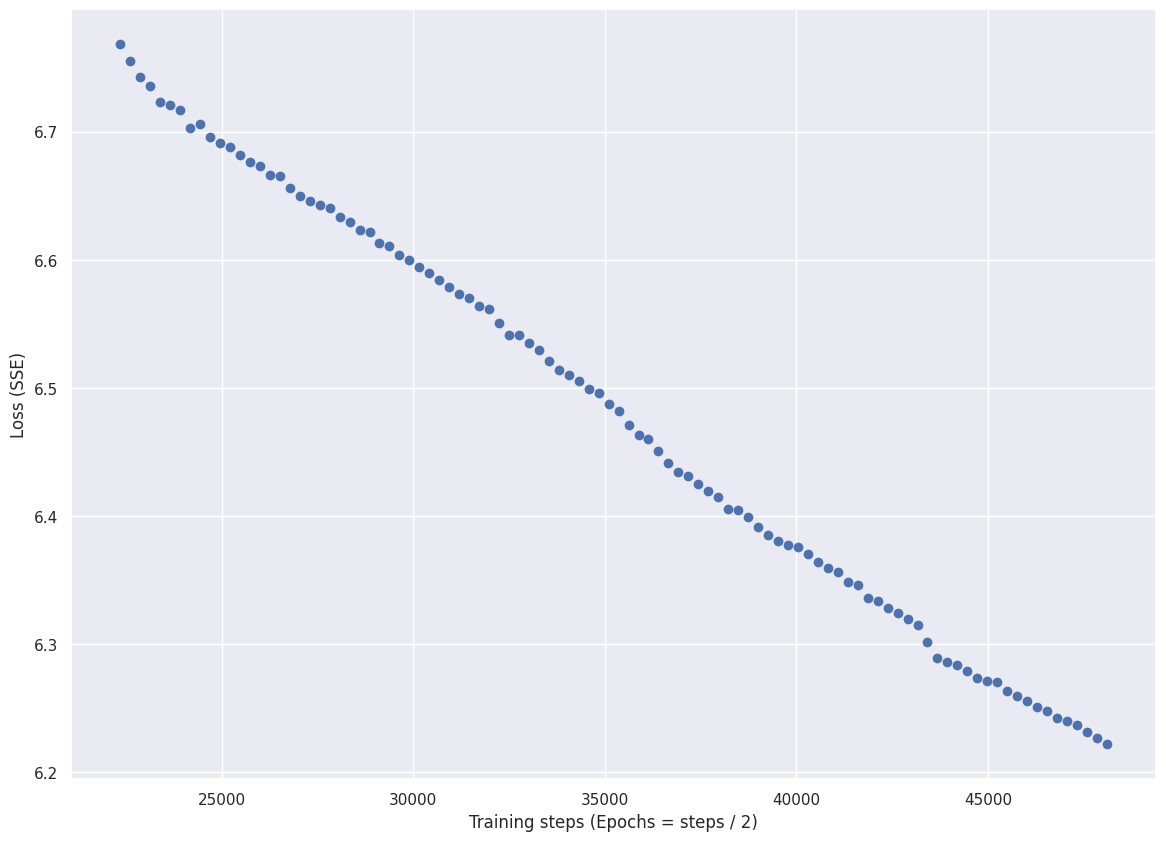

In [23]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [25]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])


print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f celcius" % median_absolute_error(
                                            y_test, predictions))
# print("Test Accuracy : {} %".format(np.mean(np.abs(predictions-y_test))*100))
# accuracy = np.mean(np.abs(predictions - y_test)) * 100
# accuracy = min(accuracy, 100)
# print("Test Accuracy : {} %".format(accuracy))
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

mape = np.mean(np.abs(predictions - y_test) / np.abs(y_test)) * 100
print("Test MAPE: {:.2f}%".format(mape))

The Explained Variance: 0.85
The Mean Absolute Error: 1.98 celcius
The Median Absolute Error: 1.47 celcius
Mean Squared Error:  6.324260580442944
Root Mean Squared Error:  2.514808259180597
R-squared:  0.8489057737570362
Test MAPE: 8.72%


In [26]:
compare = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare

,actual,predicted
date,,
2017-08-26,28,26.637989
2017-05-06,36,32.570770
2018-03-03,26,25.369057
2017-12-26,18,18.677483
2017-01-10,13,16.351955
...,...,...
2017-01-27,14,19.060963
2016-11-27,24,20.402916
2017-03-02,24,24.108524


In [27]:
for i in range(68):
    print('original value: ', y_test[i])
    print('predicted value: ', predictions[i])

original value:  28
predicted value:  26.637989
original value:  36
predicted value:  32.57077
original value:  26
predicted value:  25.369057
original value:  18
predicted value:  18.677483
original value:  13
predicted value:  16.351955
original value:  19
predicted value:  21.973286
original value:  34
predicted value:  32.373623
original value:  31
predicted value:  30.18683
original value:  22
predicted value:  22.807472
original value:  26
predicted value:  31.416159
original value:  28
predicted value:  27.278204
original value:  25
predicted value:  24.387466
original value:  25
predicted value:  24.926174
original value:  22
predicted value:  20.770878
original value:  28
predicted value:  33.07204
original value:  35
predicted value:  34.63748
original value:  28
predicted value:  29.988623
original value:  32
predicted value:  27.278141
original value:  34
predicted value:  30.050484
original value:  28
predicted value:  28.588863
original value:  20
predicted value:  19.957

In [28]:
# print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, predictions)))

The R2 score on the Test set is:	0.849


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_train :  (540, 36)
y_train :  (540,)
X_test :  (136, 36)
y_test :  (136,)


In [30]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [31]:
#applying the neurons in the layers with weights and biases to work on the algorithm....linear regression is applied... y =mx_c.
model = Sequential()
model.add(Dense(13, input_shape=(36,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Runs model for 2000 iterations and assigns this to 'history'
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                481       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainabl

In [33]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.2, verbose = 1)

Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 713.9677 - val_loss: 693.6433
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 657.2177 - val_loss: 580.8978
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 426.4175 - val_loss: 218.9809
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 174.0135 - val_loss: 104.7718
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 87.7546 - val_loss: 61.1928
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 54.2188 - val_loss: 51.9105
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 39.4209 - val_loss: 41.4410
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 31.9736 - val_loss: 34.6748
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 27.9652 - val_loss: 32.1738
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 24.0732 

In [34]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.817494,3.400931,95
96,1.724203,3.344302,96
97,1.750514,3.484037,97
98,1.848594,3.334432,98
99,1.701109,3.434766,99


In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

5/5 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.948
The R2 score on the Test set is:	0.885


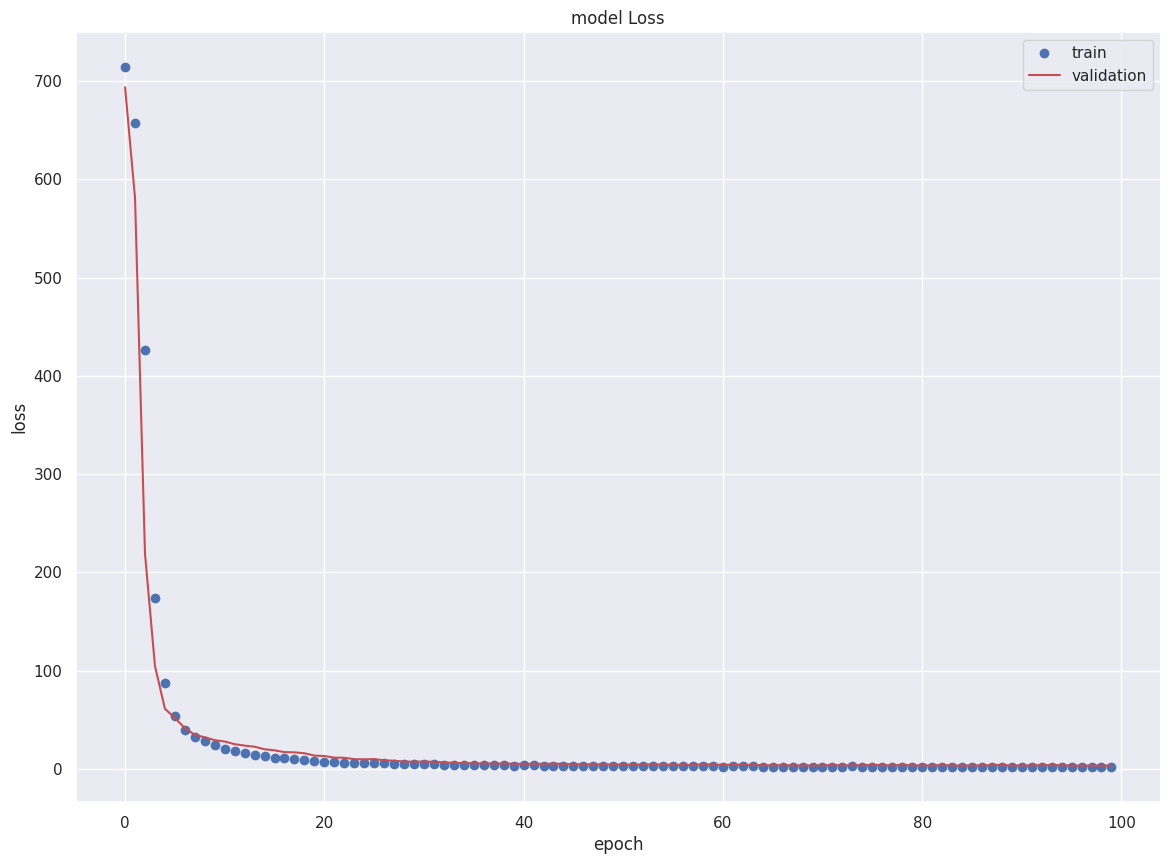

In [36]:
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(loss_values,'bo',label='training loss')

plt.plot(val_loss_values,'r',label='validation loss ')
plt.legend(['train', 'validation'], loc='upper right')